# Dov2Vec Visualization
- Using Embedding Projector
- https://projector.tensorflow.org/
  - Click Load button
  - Step 1: Load a TSV file of vectors. (vec.tsv)
  - Step 2 (optional): Load a TSV file of metadata. (meta.tsv)

## Data Load

In [2]:
import pickle as pkl
import pandas as pd
from tqdm import tqdm
import csv
import math
import matplotlib.pyplot as plt

In [3]:
filename = "title_doc2vec_10"
dirname = "./"
with open(f'{dirname}{filename}','rb') as f:
    check=pkl.load(f)
check

array([['uGOskK94nPU', -0.08517749607563019, -0.019516516476869583, ...,
        -0.05208853259682655, 0.07557915896177292, 0.03826812654733658],
       ['6Xu_RjV0Wjo', 0.0323508158326149, -0.0371243990957737, ...,
        0.010399461723864079, 0.07157309353351593, 0.04861436411738396],
       ['MPU7iOsUJtI', 0.04336806386709213, -0.038680095225572586, ...,
        -0.03610117733478546, -0.0018800586694851518,
        0.11077877879142761],
       ...,
       ['uxHEEL1FiC4', 7.447332859039307, 0.693562388420105, ...,
        1.9709093570709229, -4.837487697601318, -6.468739032745361],
       ['8sCWie2iQNo', 6.721325874328613, 0.007541008293628693, ...,
        2.2872204780578613, -3.8326733112335205, -6.135721683502197],
       ['f7vLt3My9Fc', -11.178154945373535, 1.1947723627090454, ...,
        6.3039350509643555, -9.653636932373047, -5.391703128814697]],
      dtype=object)

In [4]:
df = pd.read_csv('vid_0510_merged.csv')
df

,video_id,publish_time,publish_date,channel_id,title,views,period_day,channel_title,subscriber_count,tags,...,dislikes,comment_count,description,desc_len,len_title,No_tags,video_error_or_removed,trending_date,comments_disabled,ratings_disabled
0,ZBTPLVePE7M,12:00:32,2023-05-04,UCxtLc0Jqq3SKBWlIXM_OC9g,ASMR RAINBOW DESSERTS 무지개 아이스크림 ICE CREAM KOHA...,218571,2.0,Hongyu ASMR 홍유,14900000,"""most popular food videos,most popular food as...",...,False,132.0,"ASMR ICE CREAM DOESN'T MELT, EYEBALL GUMMY, DI...",358.0,100.0,0.0,False,0.0,False,False
1,aRM3hYrs8vc,08:45:01,2023-05-05,UCq9MDndXc1y3he3uPZLPskQ,현재시간 새벽5시.. 배고파서 김밥천국 털러갔습니다.🤣 그런데 손님이 왜이렇게 많죠...,151990,1.0,[Nareum_TV] 나름TV,2360000,"""food asmr,MUKBANG,korean mukbang,korean food,...",...,False,415.0,#먹방 #구독 #좋아요\n2:10 먹방시작\n\n*비지니스 문의 \nmelody30...,397.0,71.0,0.0,False,0.0,False,False
2,g7wcHPE8py4,12:15:08,2023-05-05,UCPVENfTGbgD-CUuvrN7rRGQ,새벽2시 엽떡 허니콤보 치킨 떡볶이 먹방 교촌치킨 블랙시크릿 엽기떡볶이 중국당면 분...,117617,1.0,상해기SangHyuk,1130000,"""치킨먹방,치킨,허니콤보,치킨 먹방,교촌치킨,BBQ,BHC,뿌링클,치킨마요덮밥,치킨...",...,False,192.0,새벽2시 엽떡 허니콤보 치킨 떡볶이 먹방 교촌치킨 블랙시크릿 엽기떡볶이 중국당면 분...,516.0,87.0,0.0,False,0.0,False,False
3,HmphRR9IdOk,12:00:11,2023-05-02,UCfpaSruWW3S4dibonKXENjA,85세 할머니께서 많이 놀라셨습니다🤣 70년전통 오장동냉면 전메뉴먹방,1854791,4.0,tzuyang쯔양,8110000,"""real sound,리얼사운드,social eating,mukbang,eating...",...,False,1391.0,각국어 번역 자막 제작 : \n컨텐츠 제작의 마무리는 컨텐츠플라이! 글로벌 진출을 ...,138.0,38.0,0.0,False,0.0,False,False
4,nUPm-loO4FE,12:00:40,2023-05-04,UCfpaSruWW3S4dibonKXENjA,쯔왕돈까스 해명하겠습니다🤔,1598348,2.0,tzuyang쯔양,8110000,"""real sound,리얼사운드,social eating,mukbang,eating...",...,False,2824.0,각국어 번역 자막 제작 : \n컨텐츠 제작의 마무리는 컨텐츠플라이! 글로벌 진출을 ...,138.0,14.0,0.0,False,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,zWjQ58nqU64,12:00:37,2022-01-29,UCfTAKBeIxcAIXvGLjZGNI3Q,한우 우설 구이 먹방! *소혀 Real Sound MUKBANG | ASMR | E...,163478,462.0,ONHWA ASMR,487000,yt:cc=on|Mukbang|ASMR|Eating Sound|먹방|먹방asmr|モ...,...,False,186.0,온덕이여러분~💕 오늘은 한우 우설 구이입니다😊 추가적인 설명은 아래 고정댓글 확인...,443.0,77.0,0.0,False,0.0,False,False
15283,ZWp0SJ47wkM,06:56:38,2017-04-10,UCYY_0a0-NbRRO7hr1q2hRxw,Real sound 짬뽕 먹방,384286,2217.0,갓 형 욱,59900,먹방|갓형욱|현기증남|애봉이 철구 밴쯔 창현 세아 감스트턱형한나김이브윰댕대도서관잠뜰...,...,False,799.0,갓형욱현기증남의 먹방 짬뽕먹방,44.0,24.0,0.0,False,0.0,False,False
15284,zwZPv7xq-bc,10:00:38,2022-06-08,UCE6e9tjKl3l3nGlAcxH7GQg,ASMR 다 먹을 수 있을까요? 치킨 닭다리 53개 리얼먹방 :) I'll try ...,1881161,332.0,[AmiAmi]아미아미,1380000,NaN,...,False,842.0,이 영상은 노상치킨 지원(광고)으로 제작되었습니다 [노상치킨 6월 배달의 민족 ...,1543.0,103.0,1.0,False,0.0,False,False
15285,zxxiSmv-FJ4,12:38:49,2020-04-28,UCRtoqRleHkDQRVgN9OwV6TA,MUKBANG ASMR 짜왕 자장면 & 자메이카 치킨 먹방 BLACK BEAN NO...,837706,1103.0,SIO ASMR,9120000,sio|시오|asmr sio|asmr시오|yt:cc=on|ASMR|MUKBANG|M...,...,False,957.0,시오 구독하기🍒 https://goo.gl/azcgUX 시오 인스타...,769.0,124.0,0.0,False,0.0,False,False


## Make TSV file

In [5]:
vid_list = []
vec_list = []
for row in tqdm(check):
    vid=row[0]
    vec=row[1:]
    vid_list.append(vid)
    vec_list.append(vec)

print(len(vid_list), len(vec_list))

100%|██████████| 15287/15287 [00:00<00:00, 1091375.75it/s]

15287 15287


### vec.tsv

In [6]:
# write TSV files
with open(f'{filename}_vec.tsv', 'w', encoding='utf-8', newline='') as f:
    tw = csv.writer(f, delimiter='\t')
    for vec in tqdm(vec_list):
        tw.writerow(vec)

100%|██████████| 15287/15287 [00:00<00:00, 110765.78it/s]


### meta.tsv

In [7]:
def normalize_views(views, day):
  return math.floor(math.log(views + 10 / math.log2(day + 2), 10))

In [8]:
# write TSV files
label_dict = {}
with open(f'{filename}_meta.tsv', 'w', encoding='utf-8', newline='') as f:
    tw = csv.writer(f, delimiter='\t')
    tw.writerow(["title", "vid", "label"])
    for vid in tqdm(vid_list):
        row = df[df['video_id'] == vid]
        day = row['period_day'].values[0]
        views = row['views'].values[0]
        label = normalize_views(views, day) # optional
        if label in label_dict:
            label_dict[label] += 1
        else:
            label_dict[label] = 1
        tw.writerow([row['title'].values[0].replace('\t',' ').replace('\n', ' ').replace('\r', ' '), vid, label])

100%|██████████| 15287/15287 [00:16<00:00, 909.29it/s]


## (Optional) View count labeling

In [14]:
sorted_dict = sorted(label_dict.items(), key = lambda item: item[0])
views_dict = {}
for k, v in sorted_dict:
    views_dict[k] = v
print(views_dict)

{0: 110, 1: 904, 2: 1985, 3: 1901, 4: 2491, 5: 4214, 6: 2979, 7: 653, 8: 50}


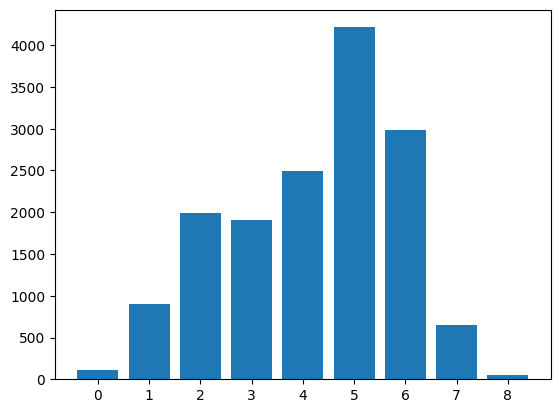

In [15]:
label = list(views_dict.keys())
count = list(views_dict.values())
plt.bar(range(len(views_dict)), count, tick_label=label)
plt.show()